# Real Time Multi Style Transfer Demo

My implementation in Pytorch of an adaption of the paper [A LEARNED REPRESENTATION FOR ARTISTIC STYLE (Vincent Dumoulin & Jonathon Shlens & Manjunath Kudlur)](https://arxiv.org/pdf/1610.07629.pdf) .

In [1]:
!git clone https://github.com/ryanwongsa/Real-time-multi-style-transfer.git

Cloning into 'Real-time-multi-style-transfer'...
remote: Enumerating objects: 114, done.
remote: Total 114 (delta 0), reused 0 (delta 0), pack-reused 114
Receiving objects: 100% (114/114), 204.64 MiB | 14.27 MiB/s, done.
Resolving deltas: 100% (44/44), done.


In [2]:
cd Real-time-multi-style-transfer/

/content/Real-time-multi-style-transfer


In [7]:
!wget https://www.dropbox.com/s/ylfwc7otesv1z6y/pastichemodel-FINAL.pth -P style16/
!wget https://www.dropbox.com/s/5b0g5lpl9uzp0hs/sample.jpg

--2019-09-14 17:01:19--  https://www.dropbox.com/s/ylfwc7otesv1z6y/pastichemodel-FINAL.pth
Resolving www.dropbox.com (www.dropbox.com)... 162.125.81.1, 2620:100:6031:1::a27d:5101
Connecting to www.dropbox.com (www.dropbox.com)|162.125.81.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/ylfwc7otesv1z6y/pastichemodel-FINAL.pth [following]
--2019-09-14 17:01:20--  https://www.dropbox.com/s/raw/ylfwc7otesv1z6y/pastichemodel-FINAL.pth
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uceff551e8a855935dd6cf462d16.dl.dropboxusercontent.com/cd/0/inline/AogmNj7zjNirL9MfgZbK8c17PkajX2kZ1EhBEXeSt6Zb_OXkFEhZZlP9KpQPPBT1WroEjyxHRy0vgDqms8qgzZB-DS6EAs662jCw8jLs83NdqDvFTDivODa1pstDM3mf__Y/file# [following]
--2019-09-14 17:01:20--  https://uceff551e8a855935dd6cf462d16.dl.dropboxusercontent.com/cd/0/inline/AogmNj7zjNirL9MfgZbK8c17PkajX2kZ1EhBEXeSt6Zb_OXkFEhZZlP9KpQPPBT1WroEjyxHRy0vgD

In [0]:
import torch
from torchvision import transforms
from inference.Inferencer import Inferencer
from models.PasticheModel import PasticheModel
from PIL import Image

In [0]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

num_styles = 16
image_size = 512
model_save_dir = "style16/pastichemodel-FINAL.pth"

pastichemodel = PasticheModel(num_styles)

inference = Inferencer(pastichemodel,device,image_size)
inference.load_model_weights(model_save_dir)

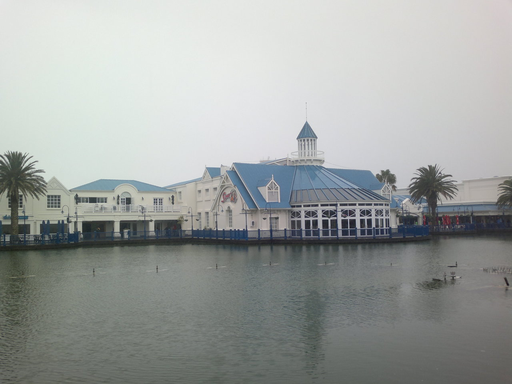

In [37]:
example_image_path = "sample.jpg"
im = Image.open(example_image_path).convert('RGB')
im.thumbnail((image_size,image_size),Image.ANTIALIAS)
im

# Inference

The pretrained model has 16 different styles. The method `eval_image` arguments are: 
- PIL image
- First Style (0-15)
- Second Style (0-15)
- Percentage mixture between the two styles (0.0-1.0)

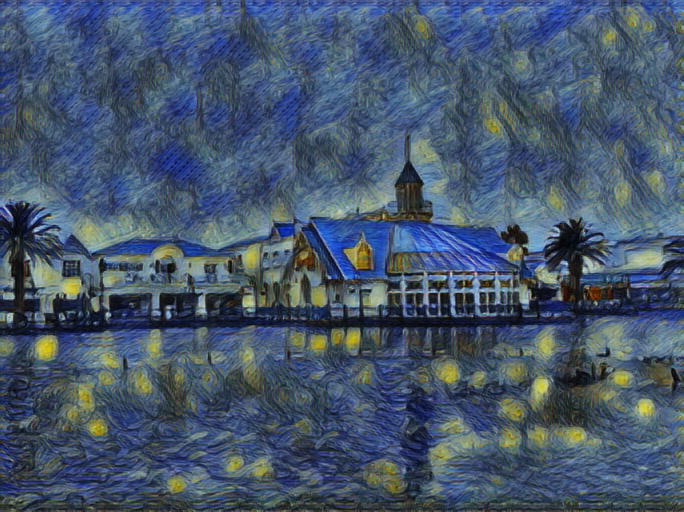

In [40]:
# Style 5
inference.eval_image(im, 1,5,0.0)

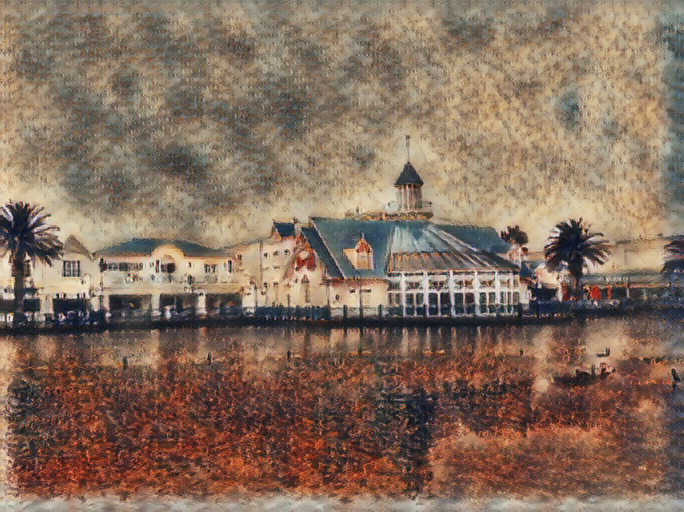

In [41]:
# Style 1
inference.eval_image(im, 1,5,1.0)

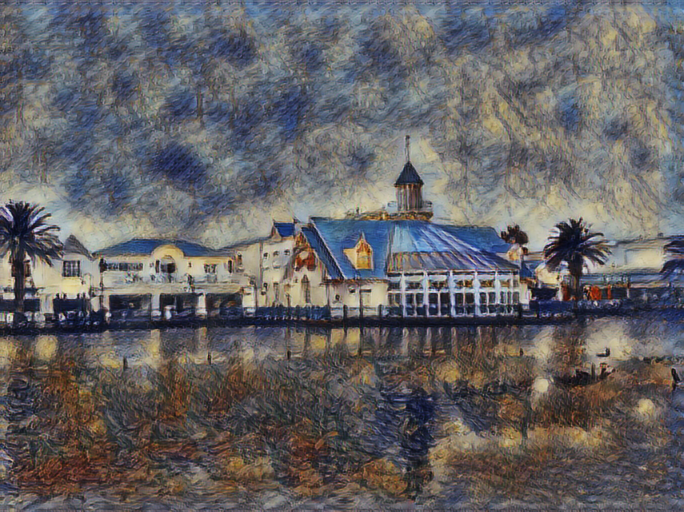

In [42]:
# Style 1 and 5 with 50% of each
inference.eval_image(im, 1,5,0.5)